In [1]:
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set() # setting seaborn default for plots
import matplotlib.font_manager as fm
import copy
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np


from scipy import stats  # Box-Cox 검정
import statsmodels.api as sm  # qqplot
from statsmodels.tsa.stattools import adfuller    # adfuller : ADF그래프 그려주는 함수
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.stats.diagnostic import acorr_ljungbox # Ljung-Box 검정

import warnings
warnings.filterwarnings("ignore")

import itertools



In [2]:
# 한글폰트로 설정(그래프깨짐 방지)

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]


font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
 
#font 설정
mpl.rc('font',family=font_name)

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['Malgun Gothic']


In [3]:
import FinanceDataReader as fdr
from pykrx import stock
fdr.__version__

'0.9.6'

In [4]:
df = stock.get_market_ohlcv_by_date("20190701", "20200831", "122870") # DataFrame
# df = stock.get_market_ohlcv_by_date("20180810", "20181212", "005930", "m") d : 일 m : 월, y : 년도
print(df.head(3))
print(df.tail(3))

               시가     고가     저가     종가     거래량
날짜                                            
2019-07-01  29100  29400  28400  28500  233660
2019-07-02  28250  29800  28200  29000  384554
2019-07-03  29300  29300  28350  28550  264976
               시가     고가     저가     종가      거래량
날짜                                             
2020-08-27  49950  51400  49450  50900   528784
2020-08-28  50900  52500  47600  49000  1298643
2020-08-31  48950  49000  46000  46650   748647


In [5]:
df_close=pd.DataFrame(df['종가'])
df_close

,종가
날짜,
2019-07-01,28500
2019-07-02,29000
2019-07-03,28550
2019-07-04,28850
2019-07-05,29050
...,...
2020-08-25,48700
2020-08-26,50400
2020-08-27,50900


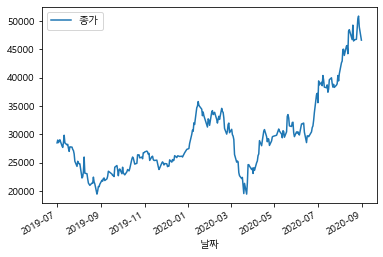

In [6]:
df_close.plot()

# Train, Test 데이터셋 생성 (Train : 약 1년, Test : 약 2달)

In [7]:
train=df_close['종가'][:'2020-07-01']
test=df_close['종가']['2020-07-02':]

# 시계열 분해 (분기별)

In [8]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

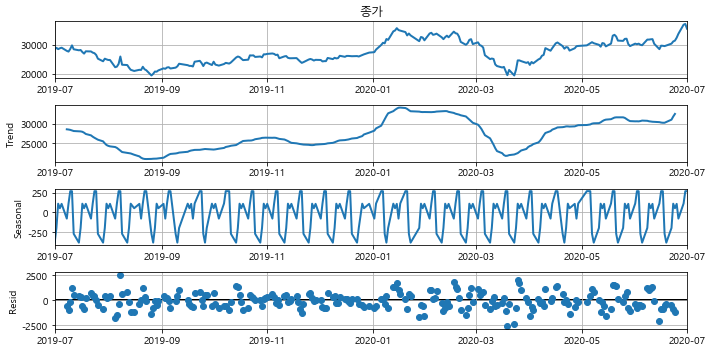

In [9]:
# Period = 10 (2-WEEK)
result = seasonal_decompose(train.dropna(), model='additive',period=10) 
result.plot()
plt.show()

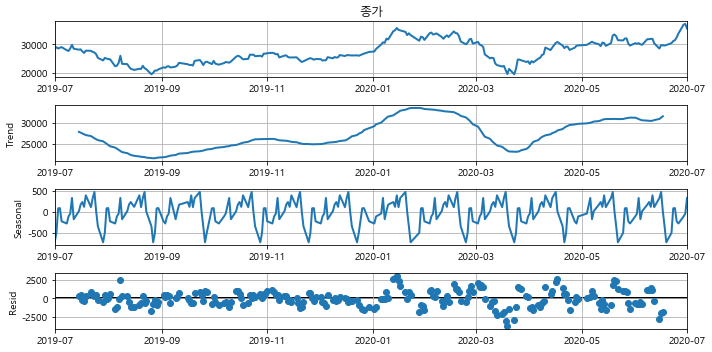

In [10]:
# Period = 20 (1-MONTH )
result = seasonal_decompose(train.dropna(), model='additive',period=20) 
result.plot()
plt.show()

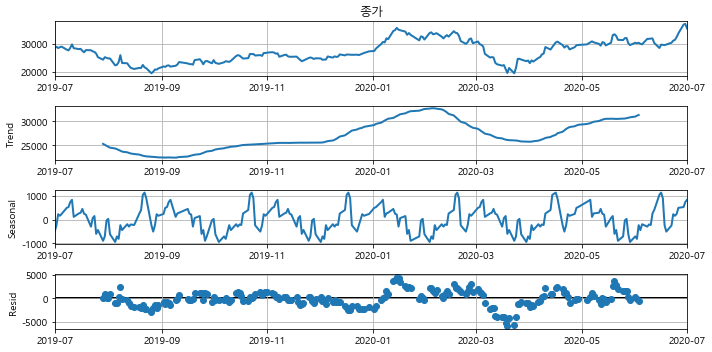

In [11]:
# Period = 40 (2-MONTH )
result = seasonal_decompose(train.dropna(), model='additive',period=40) 
result.plot()
plt.show()

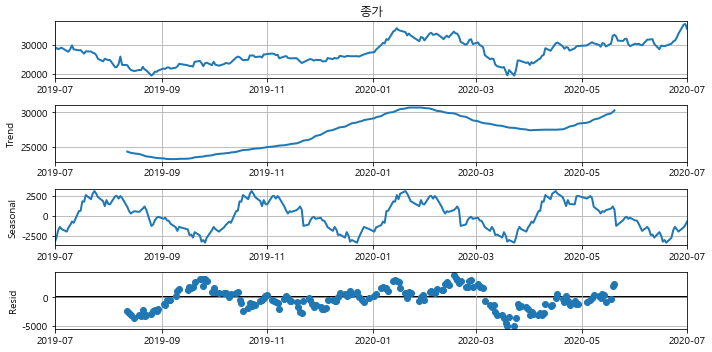

In [12]:
# Period = 60 (3-MONTH )
result = seasonal_decompose(train.dropna(), model='additive',period=60) 
result.plot()
plt.show()

# 잔차분포

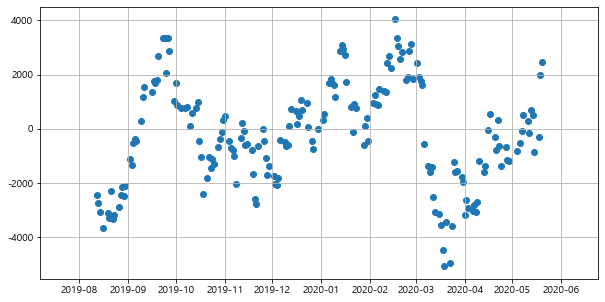

In [13]:
residual=result.resid
residual=residual.dropna()

# 잔차 분포
plt.scatter(x=residual.index,y=residual)

(array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  3.,  5.,  4.,  5.,
         3.,  4.,  1.,  5.,  3.,  4.,  5.,  7.,  7.,  3.,  6., 13., 11.,
         2.,  8.,  5.,  6.,  7.,  6.,  9.,  5.,  3.,  4.,  3., 10.,  4.,
         1.,  1.,  4.,  3.,  4.,  3.,  1.,  4.,  0.,  0.,  1.]),
 array([-5089.62268519, -4907.02407407, -4724.42546296, -4541.82685185,
        -4359.22824074, -4176.62962963, -3994.03101852, -3811.43240741,
        -3628.8337963 , -3446.23518519, -3263.63657407, -3081.03796296,
        -2898.43935185, -2715.84074074, -2533.24212963, -2350.64351852,
        -2168.04490741, -1985.4462963 , -1802.84768519, -1620.24907407,
        -1437.65046296, -1255.05185185, -1072.45324074,  -889.85462963,
         -707.25601852,  -524.65740741,  -342.0587963 ,  -159.46018519,
           23.13842593,   205.73703704,   388.33564815,   570.93425926,
          753.53287037,   936.13148148,  1118.73009259,  1301.3287037 ,
         1483.92731481,  1666.52592593,  1849.12453704,  2031.723148

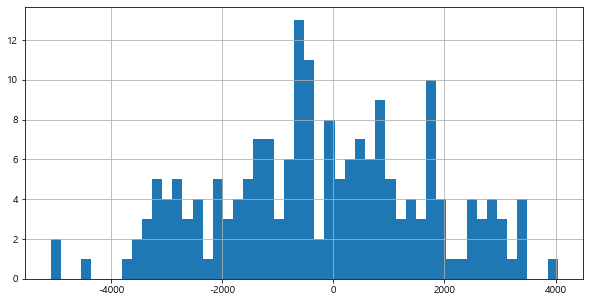

In [14]:
# 잔차 분포
plt.hist(x=residual,bins=50)

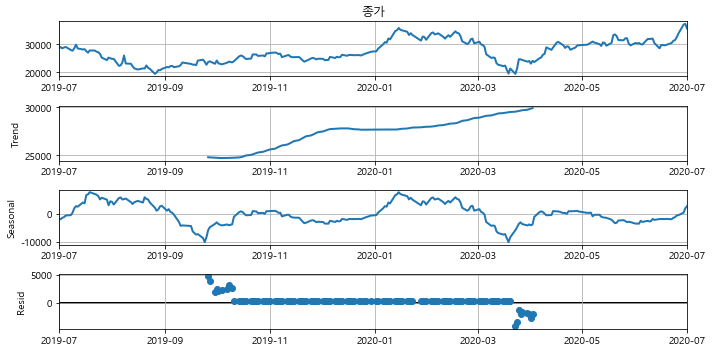

In [15]:
# Period = 120 (6-MONTH )
result = seasonal_decompose(train.dropna(), model='additive',period=120) 
result.plot()
plt.show()

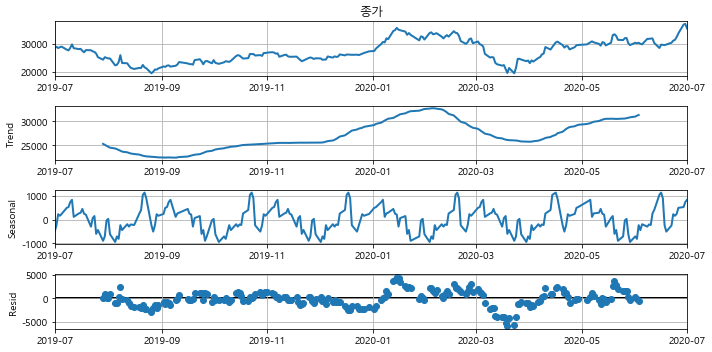

In [16]:
# Period = 40 (2-Month별)
result = seasonal_decompose(train.dropna(), model='additive',period=40) 
result.plot()
plt.show()

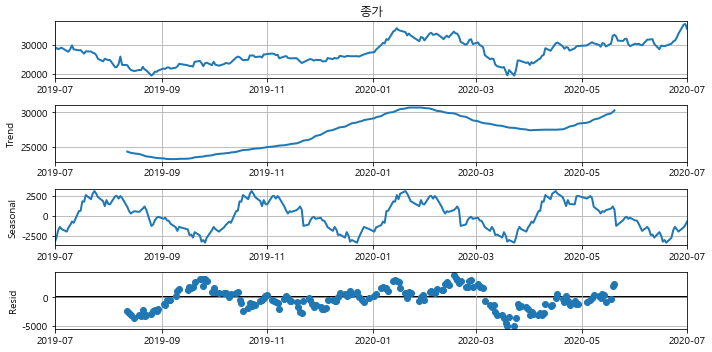

In [17]:
# Period = 60 (1-Quarter별)
result = seasonal_decompose(train.dropna(), model='additive',period=60) 
result.plot()
plt.show()

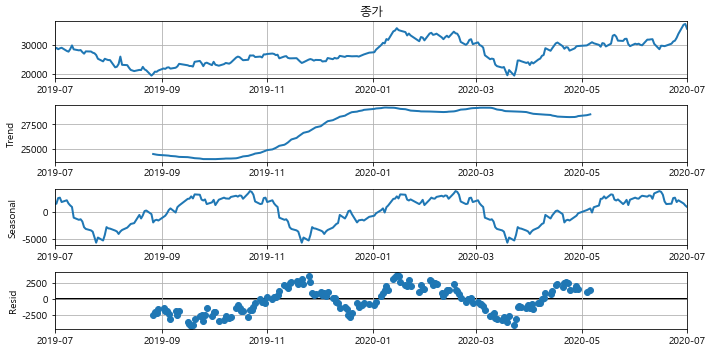

In [18]:
# Period = 80 (4개월별)
result = seasonal_decompose(train.dropna(), model='additive',period=80) 
result.plot()
plt.show()

In [19]:
def get_stationarity(timeseries,wind_date):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=wind_date).mean()
    rolling_std = timeseries.rolling(window=wind_date).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['종가'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [20]:
train=pd.DataFrame(train)

In [21]:
train

,종가
날짜,
2019-07-01,28500
2019-07-02,29000
2019-07-03,28550
2019-07-04,28850
2019-07-05,29050
...,...
2020-06-25,32500
2020-06-26,33850
2020-06-29,37000


In [22]:
train_diff=train.diff()

In [23]:
train_diff=train_diff.dropna()

In [24]:
train_diff

,종가
날짜,
2019-07-02,500.0
2019-07-03,-450.0
2019-07-04,300.0
2019-07-05,200.0
2019-07-08,-1100.0
...,...
2020-06-25,1000.0
2020-06-26,1350.0
2020-06-29,3150.0


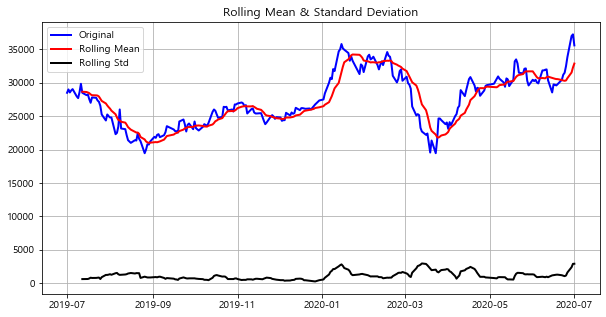

ADF Statistic: -1.3489790294860475
p-value: 0.6064773692265534
Critical Values:
	1%: -3.4569962781990573
	5%: -2.8732659015936024
	10%: -2.573018897632674


In [25]:
# 종가의 10일 이동평균과 이동 표준편차 및 Dickey-Fuller Test 보기

get_stationarity(train,10) # p-value : 0.60.. > 0.05 => Non-Stationary

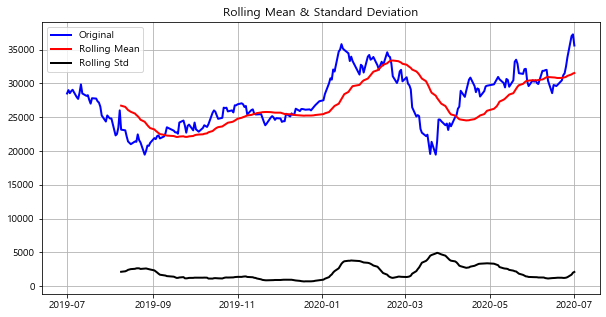

ADF Statistic: -1.3489790294860475
p-value: 0.6064773692265534
Critical Values:
	1%: -3.4569962781990573
	5%: -2.8732659015936024
	10%: -2.573018897632674


In [26]:
get_stationarity(train,30) # p-value : 0.60.. > 0.05 => Non-Stationary

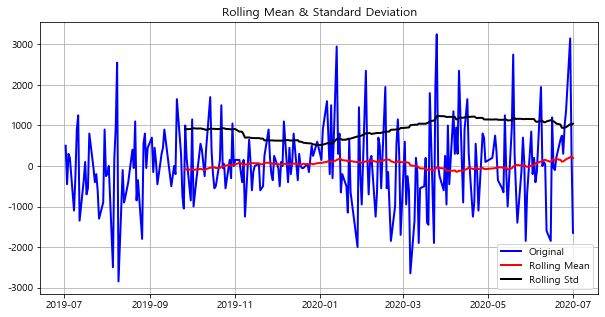

ADF Statistic: -15.120840391256168
p-value: 7.464141562524487e-28
Critical Values:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606


In [27]:
get_stationarity(train_diff,60) # p-value : 0.000000.. < 0.05 

=> Stationary, ( d = 1)

<function matplotlib.pyplot.show(*args, **kw)>

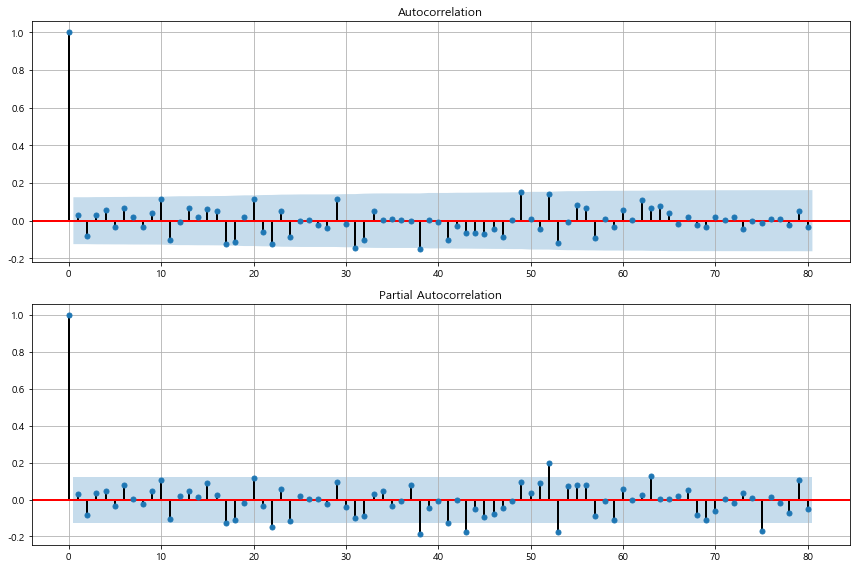

In [28]:
# 종가_1차차분 - ACF, PACF그래프 => 예상 (p,q) : (p = 0) / (q = 0)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff.dropna(), lags=80, ax=ax1, alpha=0.05)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff.dropna(),lags=80,ax=ax2,alpha=0.05)
plt.tight_layout()
plt.show

# ARIMA 모델

In [29]:
from pmdarima.arima.utils import nsdiffs # estimate number of seasonal differences using a Canova-Hansen test
from pmdarima import auto_arima

In [30]:
'''
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

lst=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}60 - AIC:{}/BIC:{}'.format(param, param_seasonal, results.aic,results.bic))
            lst.append([param,param_seasonal,results.aic,results.bic])
        except:
            continue
            
'''

"\np = d = q = range(0, 3)\npdq = list(itertools.product(p, d, q))\nseasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]\n\nprint('Examples of parameter combinations for Seasonal ARIMA...')\nprint('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))\nprint('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))\nprint('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))\nprint('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))\n\nlst=[]\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            mod = sm.tsa.statespace.SARIMAX(train,\n                                            order=param,\n                                            seasonal_order=param_seasonal,\n                                            enforce_stationarity=False,\n                                            enforce_invertibility=False)\n            results = mod.fit()\n            print('ARIMA{}x{}60 - AIC:{}/BIC:{}'.format(param, param_seasonal, results.aic,res

In [ ]:
# SARIMA                                     # (일별데이터일때, m=60) = (월별데이터일때, m=3) -> 분기별 
from pmdarima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=60,
                           seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[60]             : AIC=inf, Time=43.23 sec
 ARIMA(0,1,0)(0,1,0)[60]             : AIC=3228.217, Time=0.60 sec
 ARIMA(1,1,0)(1,1,0)[60]             : AIC=3216.825, Time=9.82 sec
 ARIMA(0,1,1)(0,1,1)[60]             : AIC=3213.153, Time=9.57 sec
 ARIMA(0,1,1)(0,1,0)[60]             : AIC=3229.651, Time=0.46 sec
 ARIMA(0,1,1)(1,1,1)[60]             : AIC=inf, Time=36.72 sec
 ARIMA(0,1,1)(0,1,2)[60]             : AIC=inf, Time=41.37 sec
 ARIMA(0,1,1)(1,1,0)[60]             : AIC=3218.090, Time=4.03 sec
 ARIMA(0,1,1)(1,1,2)[60]             : AIC=inf, Time=107.80 sec
 ARIMA(0,1,0)(0,1,1)[60]             : AIC=3211.257, Time=13.98 sec
 ARIMA(0,1,0)(1,1,1)[60]             : AIC=inf, Time=29.96 sec
 ARIMA(0,1,0)(0,1,2)[60]             : AIC=3212.199, Time=18.51 sec
 ARIMA(0,1,0)(1,1,0)[60]             : AIC=3215.810, Time=4.25 sec


In [ ]:
stepwise_model.summary() # AIC : 3211, BIC : 3217, Ljung-Box(Q) : 55.42 / [0,1,0][0,1,1,60] (데이터가 일별이라 m=60이면, 1-Quarter)

In [ ]:
result_seasonal=stepwise_model.fit(train)
print(result_seasonal.summary())

In [ ]:
result_seasonal.plot_diagnostics(figsize=(12,10))
plt.show()

In [ ]:
print(test.shape) # [42,1] 약 두달치

# 예측

In [ ]:
pred_seasonal = result_seasonal.predict(n_periods=42) # test개수만큼 예측
print(pred_seasonal)

pred_seasonal = pd.DataFrame(pred_seasonal,index = test.index,columns=['Prediction'])

In [ ]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
ax1.plot(test,label='실제값' )
ax1.plot(pred_seasonal,color='red',label='예측값')
ax1.set_xlabel('Date')
ax1.set_ylabel('Y')
ax1.legend(loc=2)
plt.show

In [ ]:
# pred_seasonal : DataFrame / test : Series

In [ ]:
# Compute the Mean of Absolute Percentage Errors

mape = ((abs( pred_seasonal['Prediction'] - test ) / test)*100).mean()
print('The MAPE of our forecasts is {}%'.format( round(mape, 2) ) ) 

In [ ]:
# 예측한 한달까지만 비교(pred_sasonal_1month, test_1month)

In [ ]:
test=pd.DataFrame(test)
test

In [ ]:
test_1month=test['종가'][:'2020-08-01']
pred_seasonal_1month=pred_seasonal['Prediction'][:'2020-08-01']

In [ ]:
print(test_1month.shape,pred_seasonal_1month.shape) # 22 -> 약 한달

In [ ]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
ax1.plot(test_1month,label='실제값' )
ax1.plot(pred_seasonal_1month,color='red',label='예측값')
ax1.set_xlabel('Date')
ax1.set_ylabel('Y')
ax1.legend(loc=2)
plt.show

In [ ]:
# Compute the Mean of Absolute Percentage Errors

mape = ((abs( pred_seasonal_1month - test_1month ) / test_1month)*100).mean()
print('The MAPE of our forecasts is {}%'.format( round(mape, 2) ) ) 

# Prophet

- conda install -c conda-forge fbprophet 
- fit()하는 순간, kernel dying문제

출처: https://daewonyoon.tistory.com/266 [알락블록])

In [ ]:
#from fbprophet import Prophet